In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np

import cartopy.crs as ccrs
import cartopy as cart
import cmocean
from matplotlib.animation import FuncAnimation
import numpy.fft as fft
import matplotlib.ticker as ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


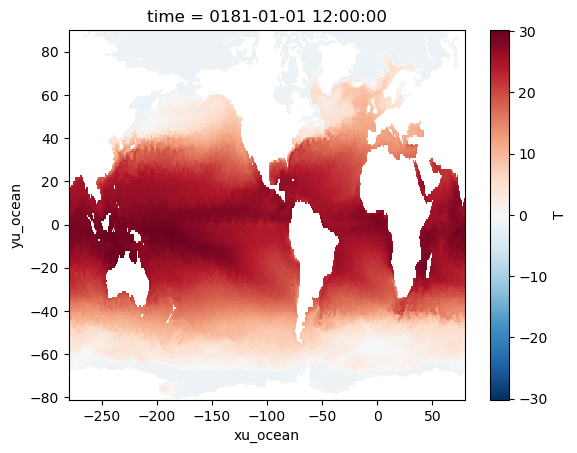

In [2]:
data = xr.open_zarr("/scratch/as15415/Data/Emulation_Data/Global_Ocean_1deg.zarr/")
data["T"][0].plot()

In [49]:
data = xr.open_zarr("/scratch/as15415/Data/Emulation_Data/Global_Ocean_1deg.zarr/")
data = data["T"]
data_1 = data.sel(xu_ocean = slice(35,80))
data_2 = data.sel(xu_ocean = slice(-280,-235))
data_2["xu_ocean"] = data_2["xu_ocean"].data+360
data = xr.concat([data_1,data_2],dim = "xu_ocean")
data = data.sel(yu_ocean = slice(-20,30))


wet =np.isnan(data[0])
wet = xr.where(wet==0,np.nan,0)    
wet = np.isnan(wet)
wet = np.nan_to_num(wet.to_numpy())
wet_bool = np.array(wet).astype(bool)

locs = np.argwhere(wet_bool)

Nx = data.xu_ocean.data.size
Ny = data.yu_ocean.data.size


In [50]:
clim = np.array(data.groupby('time.dayofyear').mean('time').compute())
clim = clim[:,wet_bool]
# clim = clim.mean(axis = [1,2])

In [51]:
def grid_vec(locs,to_plot):
    u = np.zeros((Ny,Nx))*np.nan

    u[locs[:,0],locs[:,1]] = to_plot.squeeze()
    return u

In [52]:
flattened = data[0:7305].to_numpy()[:,wet_bool]
# flattened = flattened/(flattened.mean())

In [53]:
for i in range(7305):
    day_yr = data.time.data[i].dayofyr-1
    flattened[i] = flattened[i] - clim[day_yr]

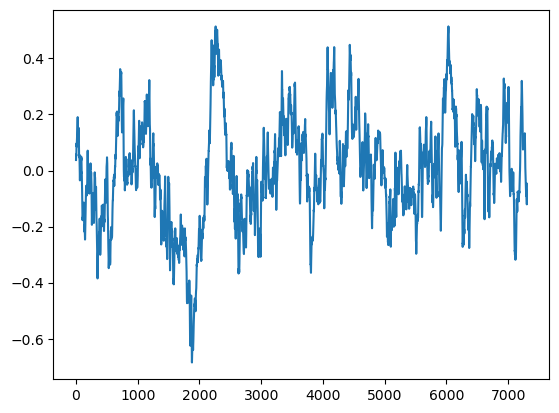

In [76]:
plt.plot(flattened.mean(axis=1))

In [55]:
U, S, V = np.linalg.svd(flattened, full_matrices=False)

Text(0.5, 1.0, 'PC1')

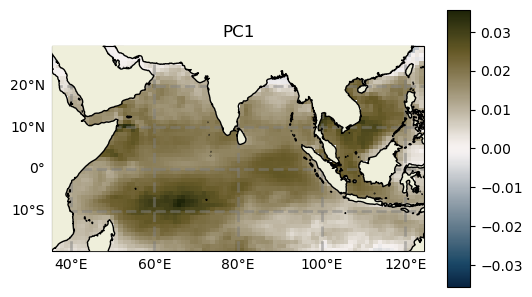

In [63]:
fig, axs = plt.subplots(1, 1, figsize=(6,6),
                        gridspec_kw={'width_ratios': [1], 'height_ratios': [1], 'wspace': 0.25,'hspace':.5},
                       subplot_kw={'projection': ccrs.PlateCarree()})
plot_1 = axs.pcolor(data.xu_ocean,data.yu_ocean,grid_vec(locs,V[0,:]),cmap = cmocean.cm.diff,norm = colors.CenteredNorm())

axs.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.yrotation = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
axs.set_title(r"CM2.6",size = 15)
plt.colorbar(plot_1,aspect=12,shrink=.6)
plt.title("PC1")

/ext3/miniconda3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:2012: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolor(*args, **kwargs)


Text(0.5, 1.0, 'PC2')

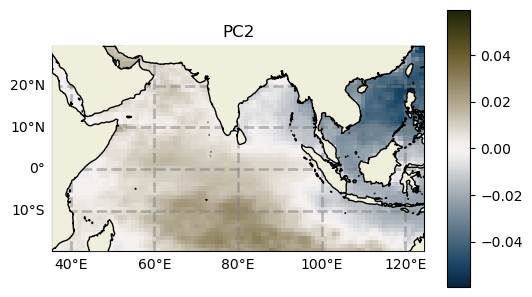

In [66]:
fig, axs = plt.subplots(1, 1, figsize=(6,6),
                        gridspec_kw={'width_ratios': [1], 'height_ratios': [1], 'wspace': 0.25,'hspace':.5},
                       subplot_kw={'projection': ccrs.PlateCarree()})
plot_1 = axs.pcolor(data.xu_ocean,data.yu_ocean,grid_vec(locs,V[1,:]),cmap = cmocean.cm.diff,norm = colors.CenteredNorm())

axs.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.yrotation = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
axs.set_title(r"CM2.6",size = 15)
plt.colorbar(plot_1,aspect=12,shrink=.6)
plt.title("PC2")

Text(0.5, 1.0, 'PC2')

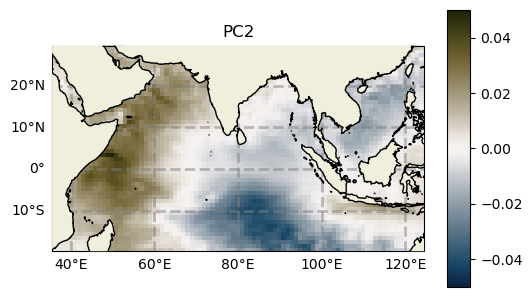

In [61]:
fig, axs = plt.subplots(1, 1, figsize=(6,6),
                        gridspec_kw={'width_ratios': [1], 'height_ratios': [1], 'wspace': 0.25,'hspace':.5},
                       subplot_kw={'projection': ccrs.PlateCarree()})
plot_1 = axs.pcolor(data.xu_ocean,data.yu_ocean,grid_vec(locs,V[2,:]),cmap = cmocean.cm.diff,norm = colors.CenteredNorm())

axs.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.yrotation = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
axs.set_title(r"CM2.6",size = 15)
plt.colorbar(plot_1,aspect=12,shrink=.6)
plt.title("PC2")

Text(0.5, 1.0, 'PC2 + PC3')

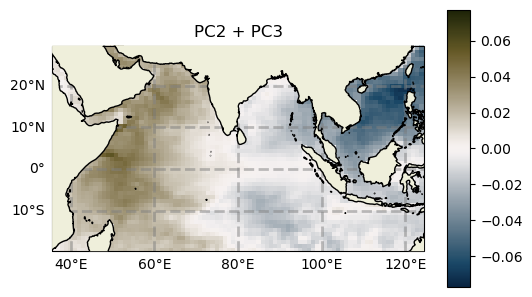

In [60]:
fig, axs = plt.subplots(1, 1, figsize=(6,6),
                        gridspec_kw={'width_ratios': [1], 'height_ratios': [1], 'wspace': 0.25,'hspace':.5},
                       subplot_kw={'projection': ccrs.PlateCarree()})
plot_1 = axs.pcolor(data.xu_ocean,data.yu_ocean,grid_vec(locs,V[2,:]+V[1,:]),cmap = cmocean.cm.diff,norm = colors.CenteredNorm())

axs.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.yrotation = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
axs.set_title(r"CM2.6",size = 15)
plt.colorbar(plot_1,aspect=12,shrink=.6)
plt.title("PC2 + PC3")

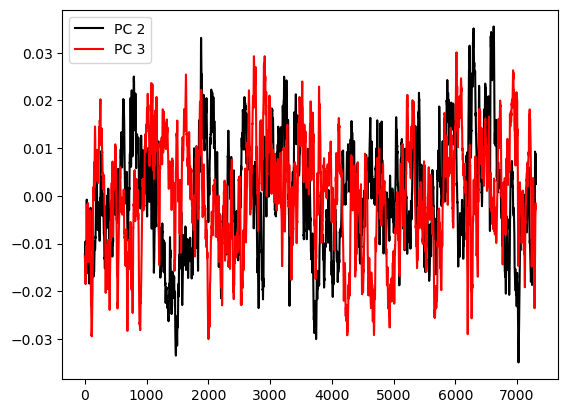

In [72]:
plt.plot(U[:,1],"k",label = "PC 2")
plt.plot(U[:,2],"r",label = "PC 3")
plt.legend()

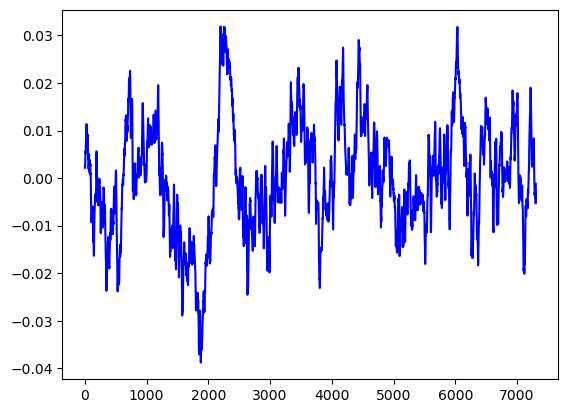

In [74]:
plt.plot(U[:,0],"b",label = "PC 1")
# plt.plot(U[:,1])
# plt.plot(U[:,2])
# plt.plot(U[:,3])

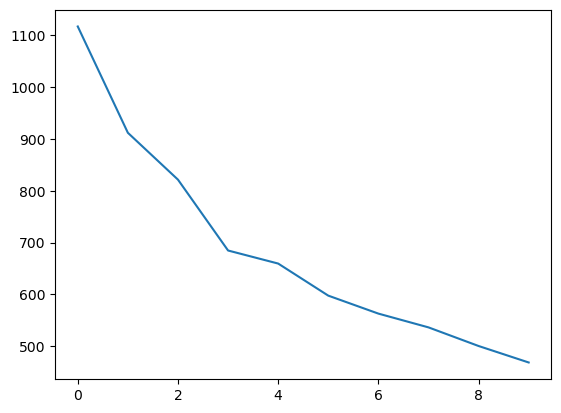

In [14]:
plt.plot(S[:10])